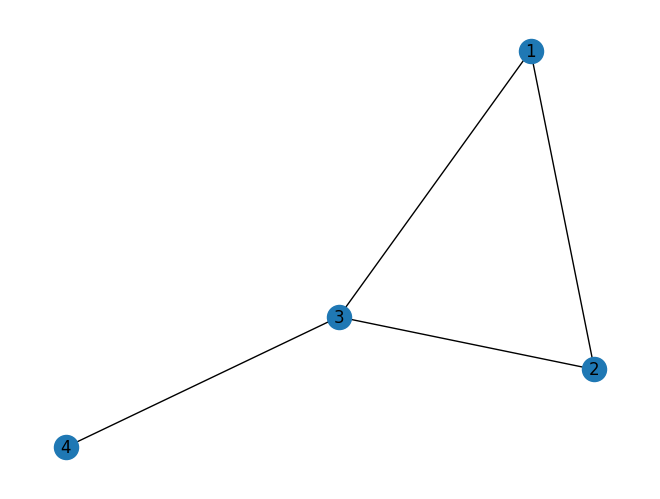

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


# Create a graph object
G = nx.Graph()
# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(3, 4)


# Draw the network
nx.draw(G, with_labels=True)
plt.show()
